<a href="https://colab.research.google.com/github/UmarNauruzov/Neural_network/blob/main/%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%B8_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Блокнот с исследованиеями различных нейросетей для определения болезни.
Заболеваний: аппендицит, гастрит, гепатит, дуоденит, колит, панкреатит, холицестит, эзофагит, энтерит, язва. Добейтесь правильного распознавания 6 и более заболеваний

Сразу обращаю внимание датасет небольшой и хороших результатов добится  сложно.

Ссылка на датасет:https://storage.yandexcloud.net/aiueducation/Content/base/l8/diseases.zip

In [ ]:
# Работа с массивами данных
import numpy as np 

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Вывод объектов в ячейке colab
from IPython.display import display

%matplotlib inline

In [ ]:
# Скачаем архив с симптомами болезней
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l8/diseases.zip', None, quiet=True)

'diseases.zip'

In [ ]:
# Распакум архив
!unzip -o diseases.zip

Archive:  diseases.zip
  inflating: dis/Аппендицит.txt  
  inflating: dis/Гастрит.txt  
  inflating: dis/Гепатит.txt  
  inflating: dis/Дуоденит.txt  
  inflating: dis/Колит.txt      
  inflating: dis/Панкреатит.txt  
  inflating: dis/Холицестит.txt  
  inflating: dis/Эзофагит.txt  
  inflating: dis/Энтерит.txt  
  inflating: dis/Язва.txt        


In [ ]:
FILE_DIR  = 'dis/'                     # Папка с текстовыми файлами

In [ ]:
# Подготовим пустые списки

CLASS_LIST = []  # Список классов 
text_train = []  # Список для оучающей выборки
text_test = []   # Список для тестовой выборки

# Зададим коэффициент разделения текста на обучающую и текстовую выборки
split_coef = 0.8

# Получим списки файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    m = file_name.split('.') # Разделим имя файла и расширение
    class_name = m[0]        # Из имени файла получим название класса
    ext = m[1]               # Выделим расширение файла                       

    if ext=='txt':                                         # Если расширение txt то берем файл в работу    
        if class_name not in CLASS_LIST:                   # Проверим, есть уже такой класс в списке
            print(f'Добавление класса "{class_name}"')     # Выведем имя нового класса
            CLASS_LIST.append(class_name)                  # Добавим новый класс в списоккласса "{class_name}"')

        cls = CLASS_LIST.index(class_name)                                        # Получим индекс (номер) нового класса
        print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}"')      # Сообщим о появлении нового класса

        with open(f'{FILE_DIR}/{file_name}', 'r') as f: # Откроем файл на чтение
            text = f.read()                                                       # Загрузка содержимого файла в строку
            text = text.replace('\n', ' ').split(' ')                             # Уберем символы перевода строк, получим список слов
            text_len=len(text)                                                    # Найдем количество прочитанных слов
            text_train.append(' '.join(text[:int(text_len*split_coef)]))          # Выделим часть файла в обучающую выборку
            text_test.append(' '.join(text[int(text_len*split_coef):]))           # Выделим часть файла в тестовую выборку



Добавление класса "Гастрит"
Добавление файла "Гастрит.txt" в класс "Гастрит"
Добавление класса "Язва"
Добавление файла "Язва.txt" в класс "Язва"
Добавление класса "Дуоденит"
Добавление файла "Дуоденит.txt" в класс "Дуоденит"
Добавление класса "Аппендицит"
Добавление файла "Аппендицит.txt" в класс "Аппендицит"
Добавление класса "Гепатит"
Добавление файла "Гепатит.txt" в класс "Гепатит"
Добавление класса "Холицестит"
Добавление файла "Холицестит.txt" в класс "Холицестит"
Добавление класса "Колит"
Добавление файла "Колит.txt" в класс "Колит"
Добавление класса "Панкреатит"
Добавление файла "Панкреатит.txt" в класс "Панкреатит"
Добавление класса "Эзофагит"
Добавление файла "Эзофагит.txt" в класс "Эзофагит"
Добавление класса "Энтерит"
Добавление файла "Энтерит.txt" в класс "Энтерит"


In [ ]:
# Найдем получившееся количество классов
CLASS_COUNT = len(CLASS_LIST) 

In [ ]:
# Выведем число получившихся классов
print(CLASS_COUNT)

10


In [ ]:
# Проверим загрузки: выведем начальные отрывки из каждого класса

for cls in range(CLASS_COUNT):             # Запустим цикл по числу классов
    print(f'Класс: {CLASS_LIST[cls]}')     # Выведем имя класса
    print(f'  train: {text_train[cls]}')   # Выведем фрагмент обучающей выборки
    print(f'  test : {text_test[cls]}')    # Выведем фрагмент тестовой выборки
    print()

Класс: Гастрит
  train: ГАСТРИТ СИМПТОМЫ  диспепсии (тяжесть и чувство давления, полноты в подложечной области, отрыжка, срыгивание, тошнота, неприятный привкус во рту, жжение в эпигастрии, изжога ) ноющая или острая жгучая боль в верхней части живота; ощущение переполненности в верхней части живота после еды; слабость, раздражительность; рвота; отсутствие аппетита; метеоризм; отрыжка; потеря веса; язык обложен грязно-желтым или серовато-белым налетом; головокружение; нарушения со стороны сердечно-сосудистой системы — кардиалгия, аритмия, артериальная неустойчивость; у пациентов с атрофическим хроническим гастритом может развиться симптомокомплекс: внезапная слабость, бледность, потливость, сонливость, в случаях инфекционного гастрита возможно появление лихорадки;  боль в животе: резкая приступообразная или постоянная мучительная; отрыжка с кислым запахом; многократная рвота ( возможна рвота с кровью);повышенное слюноотделение; иногда сухость во рту; нарушение стула: запор или понос; с

In [ ]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with

class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

In [ ]:
# Задание параметров преобразования

VOCAB_SIZE = 1800                       # Объем словаря для токенизатора
WIN_SIZE   = 50                         # Длина отрезка текста (окна) в словах
WIN_HOP    = 1                          # Шаг окна разбиения текста на векторы

In [ ]:
# Токенизация и построение частотного словаря по обучающим текстам
with timex():
    # Используется встроенный в Keras токенизатор для разбиения текста и построения частотного словаря
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Использованы параметры:
    # num_words   - объем словаря
    # filters     - убираемые из текста ненужные символы
    # lower       - приведение слов к нижнему регистру
    # split       - разделитель слов
    # char_level  - указание разделять по словам, а не по единичным символам
    # oov_token   - токен для слов, которые не вошли в словарь

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)
    
    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

Время обработки: 0.02 с


In [ ]:
# Вывод нескольких наиболее часто встречающихся слов
print(items[:120])

# Размер словаря может быть больше, чем num_words, но при преобразовании в последовательности
# и векторы bag of words будут учтены только первые num_words слов
print("Размер словаря", len(items)) 

[('неизвестное_слово', 1), ('в', 2), ('и', 3), ('боль', 4), ('или', 5), ('тошнота', 6), ('рвота', 7), ('боли', 8), ('живота', 9), ('животе', 10), ('при', 11), ('после', 12), ('с', 13), ('области', 14), ('отрыжка', 15), ('слабость', 16), ('аппетита', 17), ('во', 18), ('изжога', 19), ('тела', 20), ('вздутие', 21), ('повышение', 22), ('температуры', 23), ('пищи', 24), ('снижение', 25), ('может', 26), ('рту', 27), ('диарея', 28), ('еды', 29), ('иногда', 30), ('до', 31), ('части', 32), ('на', 33), ('метеоризм', 34), ('температура', 35), ('к', 36), ('стул', 37), ('подреберье', 38), ('верхней', 39), ('потеря', 40), ('урчание', 41), ('общая', 42), ('правом', 43), ('чувство', 44), ('ощущение', 45), ('эпигастральной', 46), ('отсутствие', 47), ('не', 48), ('кожи', 49), ('нарушение', 50), ('понос', 51), ('которая', 52), ('приема', 53), ('ощущения', 54), ('неприятный', 55), ('появление', 56), ('запор', 57), ('позывы', 58), ('желудка', 59), ('часто', 60), ('время', 61), ('за', 62), ('тяжести', 63), 

In [ ]:
# Преобразование обучающих и проверочных текстов текст в последовательности индексов согласно частотному словарю
with timex():
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    print("Фрагмент обучающего текста:")
    print("В виде оригинального текста:              ", text_train[1][:101])
    print("Он же в виде последовательности индексов: ", seq_train[1][:20])

Фрагмент обучающего текста:
В виде оригинального текста:               боль, часто локализованная в эпигастрии и уменьшающаяся после еды или антацидов.  боль описывается ка
Он же в виде последовательности индексов:  [4, 60, 493, 2, 70, 3, 781, 12, 29, 5, 363, 4, 494, 93, 142, 5, 782, 30, 93, 44]
Время обработки: 0.01 с


In [ ]:
# Функция вывода статистики по текстам
def print_text_stats(title, texts, sequences, class_labels=CLASS_LIST):
    # Суммарное количество символов и слов в тексте
    chars = 0
    words = 0

    print(f'Статистика по {title} текстам:')

    # Вывод итогов по всем классам данного набора текстов и их последовательностей индексов
    for cls in range(len(class_labels)):
        print('{:<15} {:9} символов,{:8} слов'.format(class_labels[cls],
                                                      len(texts[cls]),
                                                      len(sequences[cls])))
        chars += len(texts[cls])
        words += len(sequences[cls])

    print('----')
    print('{:<15} {:9} символов,{:8} слов\n'.format('В сумме', chars, words))

# Вывод итогов по текстам
print_text_stats('обучающим', text_train, seq_train)
print_text_stats('тестовым', text_test, seq_test)

Статистика по обучающим текстам:
Гастрит              5440 символов,     660 слов
Язва                 2728 символов,     376 слов
Дуоденит             3186 символов,     393 слов
Аппендицит           3257 символов,     471 слов
Гепатит              4385 символов,     555 слов
Холицестит           4951 символов,     675 слов
Колит                7262 символов,     950 слов
Панкреатит           9217 символов,    1183 слов
Эзофагит             4647 символов,     639 слов
Энтерит              5151 символов,     662 слов
----
В сумме             50224 символов,    6564 слов

Статистика по тестовым текстам:
Гастрит              1276 символов,     179 слов
Язва                  731 символов,      96 слов
Дуоденит              754 символов,      95 слов
Аппендицит            817 символов,     108 слов
Гепатит              1137 символов,     132 слов
Холицестит           1205 символов,     166 слов
Колит                1864 символов,     242 слов
Панкреатит           2095 символов,     297 сло

In [ ]:
# Функция разбиения последовательности на отрезки скользящим окном
# На входе - последовательность индексов, размер окна, шаг окна
def split_sequence(sequence, win_size, hop):
    # Последовательность разбивается на части до последнего полного окна
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Функция формирования выборок из последовательностей индексов
# формирует выборку отрезков и соответствующих им меток классов в виде one hot encoding
def vectorize_sequence(seq_list, win_size, hop):
    # В списке последовательности следуют в порядке их классов
    # Всего последовательностей в списке ровно столько, сколько классов
    class_count = len(seq_list)

    # Списки для исходных векторов и категориальных меток класса
    x, y = [], []

    # Для каждого класса:
    for cls in range(class_count):
        # Разбиение последовательности класса cls на отрезки
        vectors = split_sequence(seq_list[cls], win_size, hop)
        # Добавление отрезков в выборку
        x += vectors
        # Для всех отрезков класса cls добавление меток класса в виде OHE
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    # Возврат результатов как numpy-массивов
    return np.array(x), np.array(y)

In [ ]:
# Формирование обучающей и тестовой выборок
with timex():
    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP) 
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

(6074, 50) (6074, 10)
(1145, 50) (1145, 10)
Время обработки: 0.03 с


In [ ]:
# Вывод отрезка индексов тренировочной выборки
print(x_train[0])

[737 108 257  66   3  44  87 738   2 123  14  15 258   6  55  95  18  27
 141   2  70  19  96   5  77 142   4   2  39  32   9  45 333   2  39  32
   9  12  29  16 124   7  47  17  34  15  40  88  97 174]


In [ ]:
# Проверим размерности сформированных данных

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(6074, 50) (6074, 10)
(1145, 50) (1145, 10)


In [ ]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model, 
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=50,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Вывод схемы модели
    display(plot_model(model, dpi=60, show_shapes=True))

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], 
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], 
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], 
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], 
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()


# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(10, 10)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()    

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))


# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model, 
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=CLASS_LIST,
                             title='',
                             optimizer='adam',
                             epochs=50,
                             batch_size=128,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model, 
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=optimizer,
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test, 
               class_labels=class_labels, 
               title=title,
               figsize=cm_size)

#####**Исследование №1: Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)**

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 50, 50)            90000     
                                                                 
 spatial_dropout1d_18 (Spati  (None, 50, 50)           0         
 alDropout1D)                                                    
                                                                 
 batch_normalization_58 (Bat  (None, 50, 50)           200       
 chNormalization)                                                
                                                                 
 bidirectional_30 (Bidirecti  (None, 50, 16)           3776      
 onal)                                                           
                                                                 
 bidirectional_31 (Bidirecti  (None, 50, 16)           1600      
 onal)                                               

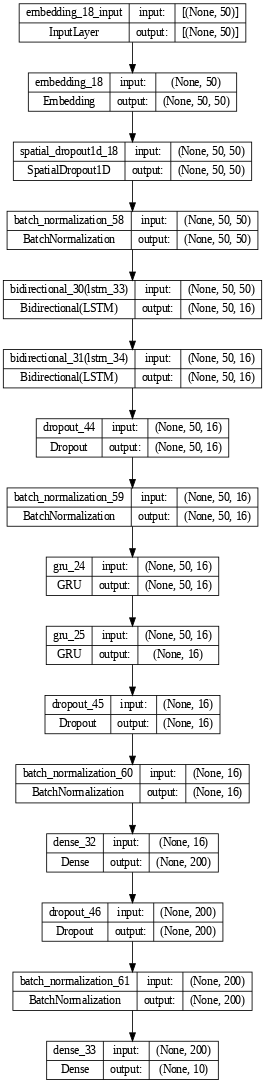

Epoch 1/100
24/24 [==============================] - 16s 197ms/step - loss: 2.3542 - accuracy: 0.2056 - val_loss: 2.2509 - val_accuracy: 0.2166
Epoch 2/100
24/24 [==============================] - 3s 108ms/step - loss: 1.3185 - accuracy: 0.5375 - val_loss: 2.2621 - val_accuracy: 0.1022
Epoch 3/100
24/24 [==============================] - 3s 126ms/step - loss: 0.6900 - accuracy: 0.7598 - val_loss: 2.3144 - val_accuracy: 0.1022
Epoch 4/100
24/24 [==============================] - 2s 68ms/step - loss: 0.3927 - accuracy: 0.8742 - val_loss: 2.3712 - val_accuracy: 0.0402
Epoch 5/100
24/24 [==============================] - 2s 73ms/step - loss: 0.2380 - accuracy: 0.9340 - val_loss: 2.4428 - val_accuracy: 0.0900
Epoch 6/100
24/24 [==============================] - 1s 58ms/step - loss: 0.1494 - accuracy: 0.9579 - val_loss: 2.4922 - val_accuracy: 0.1153
Epoch 7/100
24/24 [==============================] - 1s 43ms/step - loss: 0.0930 - accuracy: 0.9750 - val_loss: 2.6693 - val_accuracy: 0.0830
Ep

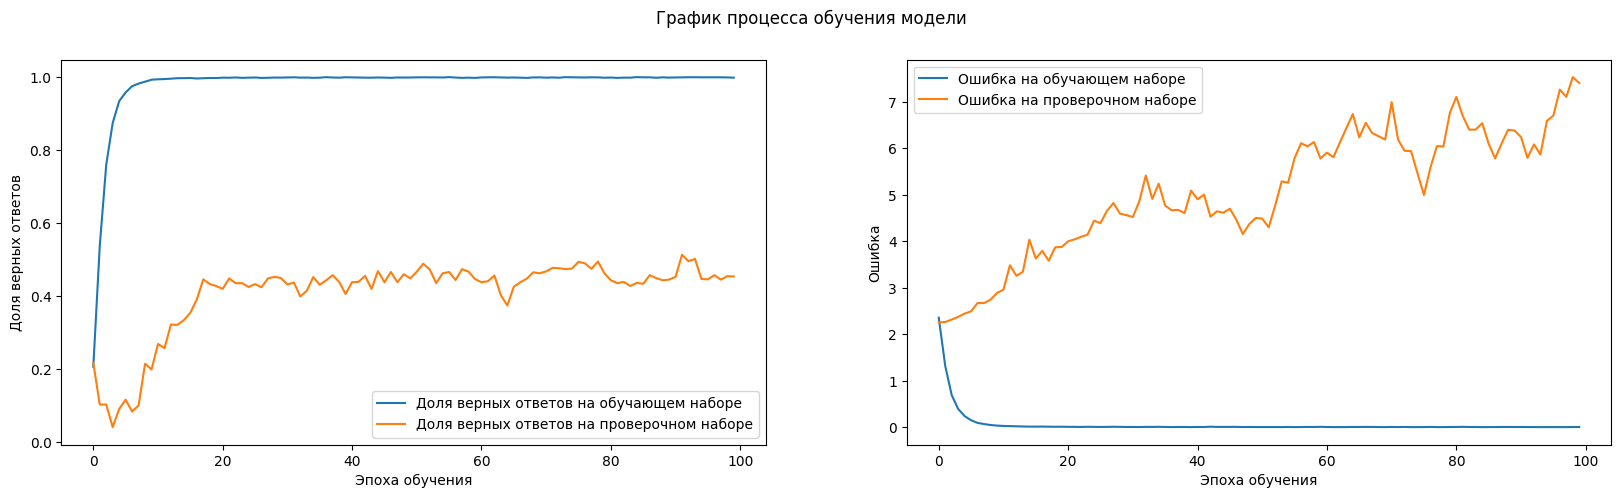

36/36 [==============================] - 3s 8ms/step


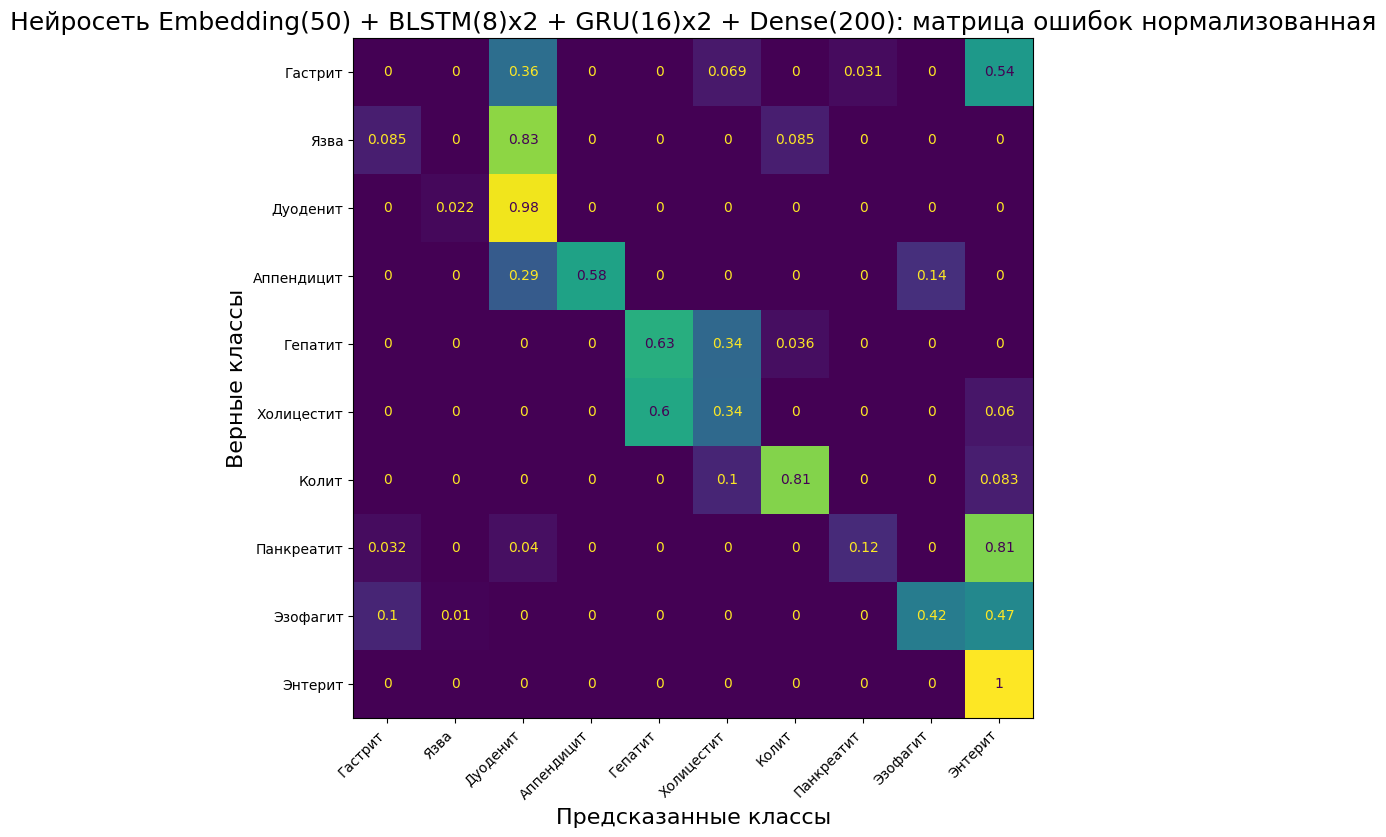

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)
Класс: Гастрит               54% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Язва                  83% сеть отнесла к классу Дуоденит             - НЕВЕРНО :-(
Класс: Дуоденит              98% сеть отнесла к классу Дуоденит             - ВЕРНО :-)
Класс: Аппендицит            58% сеть отнесла к классу Аппендицит           - ВЕРНО :-)
Класс: Гепатит               63% сеть отнесла к классу Гепатит              - ВЕРНО :-)
Класс: Холицестит            60% сеть отнесла к классу Гепатит              - НЕВЕРНО :-(
Класс: Колит                 81% сеть отнесла к классу Колит                - ВЕРНО :-)
Класс: Панкреатит            81% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Эзофагит              47% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Энтерит              100% с

In [ ]:
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=WIN_SIZE))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
# Два двунаправленных рекуррентных слоя LSTM
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Два рекуррентных слоя GRU
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Дополнительный полносвязный слой
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_LSTM_6,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='rmsprop',
                         epochs=100,
                         batch_size=256,
                         class_labels=CLASS_LIST,
                         title='Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)')

#####**Исследование №2: Embedding(50) + BLSTM(8)x2 + Dropout(0.4, 0.3)**

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 50, 50)            90000     
                                                                 
 spatial_dropout1d_14 (Spati  (None, 50, 50)           0         
 alDropout1D)                                                    
                                                                 
 batch_normalization_45 (Bat  (None, 50, 50)           200       
 chNormalization)                                                
                                                                 
 bidirectional_22 (Bidirecti  (None, 50, 16)           3776      
 onal)                                                           
                                                                 
 bidirectional_23 (Bidirecti  (None, 16)               1600      
 onal)                                               

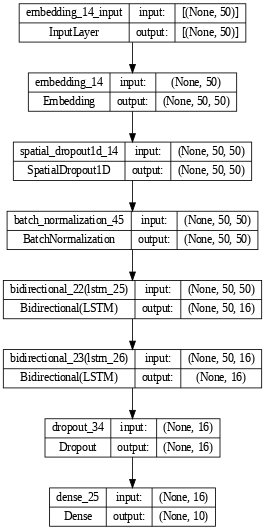

Epoch 1/100
12/12 [==============================] - 12s 301ms/step - loss: 2.1882 - accuracy: 0.2815 - val_loss: 2.2640 - val_accuracy: 0.2017
Epoch 2/100
12/12 [==============================] - 2s 148ms/step - loss: 1.9150 - accuracy: 0.5603 - val_loss: 2.2320 - val_accuracy: 0.1930
Epoch 3/100
12/12 [==============================] - 1s 124ms/step - loss: 1.6579 - accuracy: 0.6882 - val_loss: 2.1867 - val_accuracy: 0.1616
Epoch 4/100
12/12 [==============================] - 1s 128ms/step - loss: 1.4430 - accuracy: 0.7313 - val_loss: 2.1767 - val_accuracy: 0.1144
Epoch 5/100
12/12 [==============================] - 0s 37ms/step - loss: 1.2526 - accuracy: 0.7679 - val_loss: 2.1317 - val_accuracy: 0.1686
Epoch 6/100
12/12 [==============================] - 0s 21ms/step - loss: 1.0961 - accuracy: 0.8026 - val_loss: 2.2018 - val_accuracy: 0.1782
Epoch 7/100
12/12 [==============================] - 1s 42ms/step - loss: 0.9598 - accuracy: 0.8401 - val_loss: 2.4243 - val_accuracy: 0.2035
E

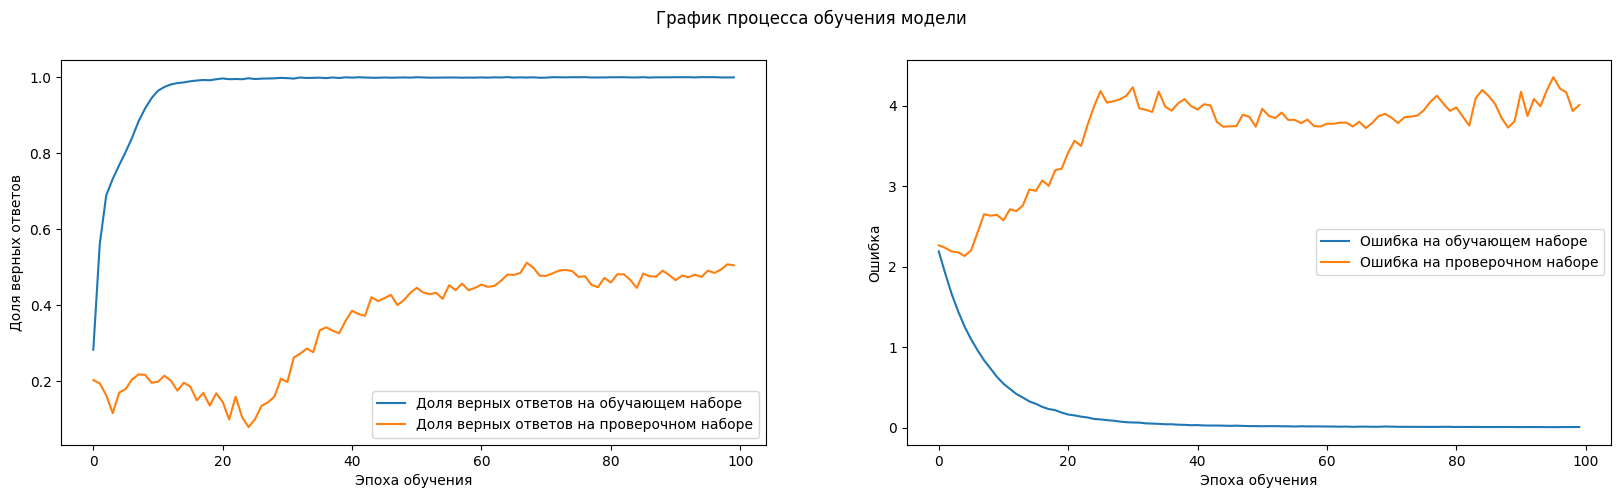

36/36 [==============================] - 1s 5ms/step


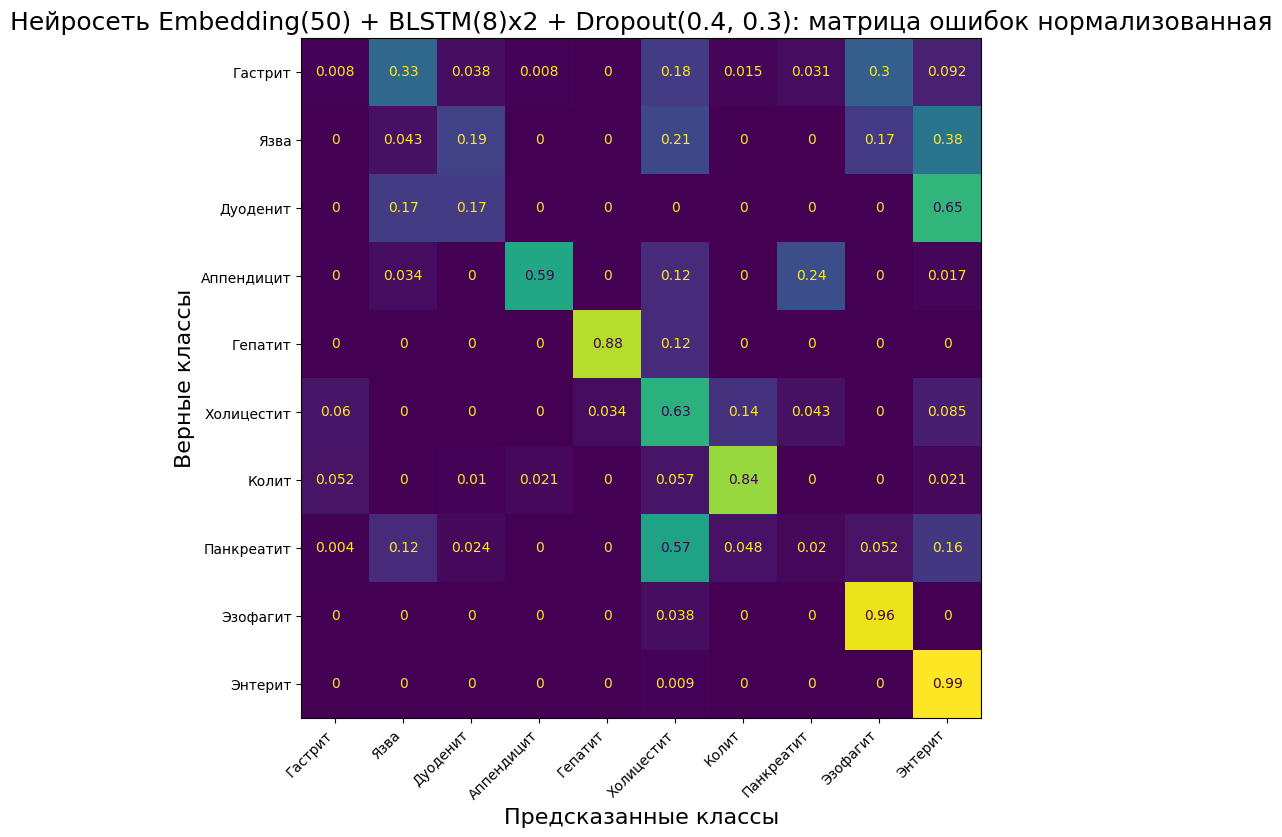

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding(50) + BLSTM(8)x2 + Dropout(0.4, 0.3)
Класс: Гастрит               33% сеть отнесла к классу Язва                 - НЕВЕРНО :-(
Класс: Язва                  38% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Дуоденит              65% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Аппендицит            59% сеть отнесла к классу Аппендицит           - ВЕРНО :-)
Класс: Гепатит               88% сеть отнесла к классу Гепатит              - ВЕРНО :-)
Класс: Холицестит            63% сеть отнесла к классу Холицестит           - ВЕРНО :-)
Класс: Колит                 84% сеть отнесла к классу Колит                - ВЕРНО :-)
Класс: Панкреатит            57% сеть отнесла к классу Холицестит           - НЕВЕРНО :-(
Класс: Эзофагит              96% сеть отнесла к классу Эзофагит             - ВЕРНО :-)
Класс: Энтерит               99% сеть отн

In [ ]:
model_LSTM_7 = Sequential()
model_LSTM_7.add(Embedding(VOCAB_SIZE, 50, input_length=WIN_SIZE))
model_LSTM_7.add(SpatialDropout1D(0.4))
model_LSTM_7.add(BatchNormalization())
# Два двунаправленных рекуррентных слоя LSTM
model_LSTM_7.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_7.add(Bidirectional(LSTM(8)))
model_LSTM_7.add(Dropout(0.3))
model_LSTM_7.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_LSTM_7,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='rmsprop',
                         epochs=100,
                         batch_size=512,
                         class_labels=CLASS_LIST,
                         title='Embedding(50) + BLSTM(8)x2 + Dropout(0.4, 0.3)')

#####**Исследование №3: Embedding(10) + LSTM(4) + Dense(100) + Flatten**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 10)            18000     
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 50, 10)           0         
 lDropout1D)                                                     
                                                                 
 batch_normalization_5 (Batc  (None, 50, 10)           40        
 hNormalization)                                                 
                                                                 
 lstm_4 (LSTM)               (None, 50, 4)             240       
                                                                 
 dropout_4 (Dropout)         (None, 50, 4)             0         
                                                                 
 batch_normalization_6 (Batc  (None, 50, 4)           

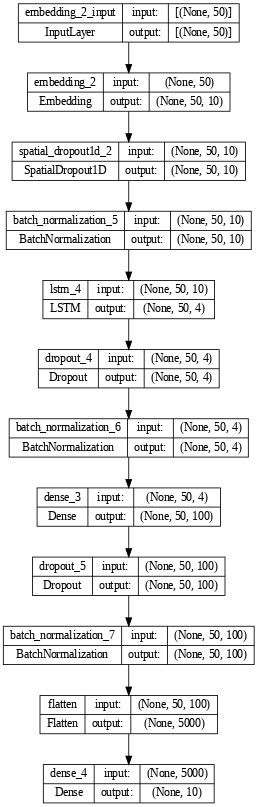

Epoch 1/100
31/31 [==============================] - 9s 170ms/step - loss: 2.3293 - accuracy: 0.2613 - val_loss: 2.2234 - val_accuracy: 0.2166
Epoch 2/100
31/31 [==============================] - 5s 150ms/step - loss: 0.9054 - accuracy: 0.6757 - val_loss: 2.2465 - val_accuracy: 0.1686
Epoch 3/100
31/31 [==============================] - 3s 104ms/step - loss: 0.4074 - accuracy: 0.8592 - val_loss: 2.4175 - val_accuracy: 0.1852
Epoch 4/100
31/31 [==============================] - 2s 62ms/step - loss: 0.2741 - accuracy: 0.9042 - val_loss: 2.4136 - val_accuracy: 0.1686
Epoch 5/100
31/31 [==============================] - 2s 60ms/step - loss: 0.2000 - accuracy: 0.9322 - val_loss: 2.4319 - val_accuracy: 0.2341
Epoch 6/100
31/31 [==============================] - 2s 59ms/step - loss: 0.1709 - accuracy: 0.9473 - val_loss: 2.6701 - val_accuracy: 0.1074
Epoch 7/100
31/31 [==============================] - 1s 45ms/step - loss: 0.1357 - accuracy: 0.9582 - val_loss: 2.7497 - val_accuracy: 0.1974
Epo

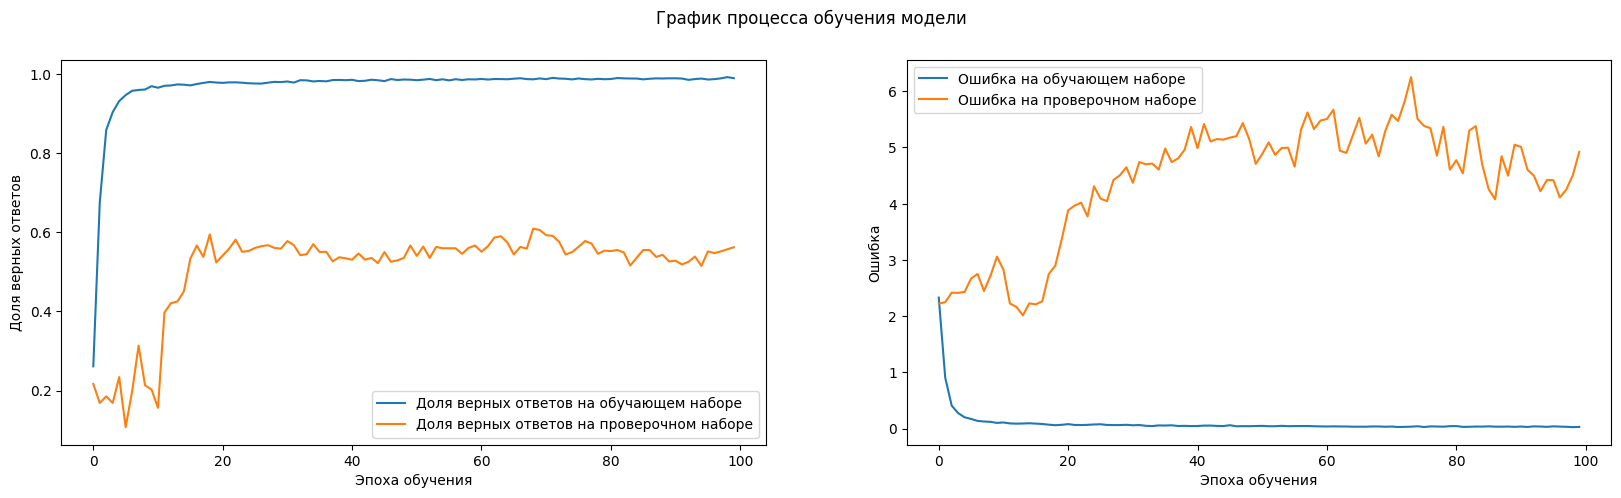

36/36 [==============================] - 1s 4ms/step


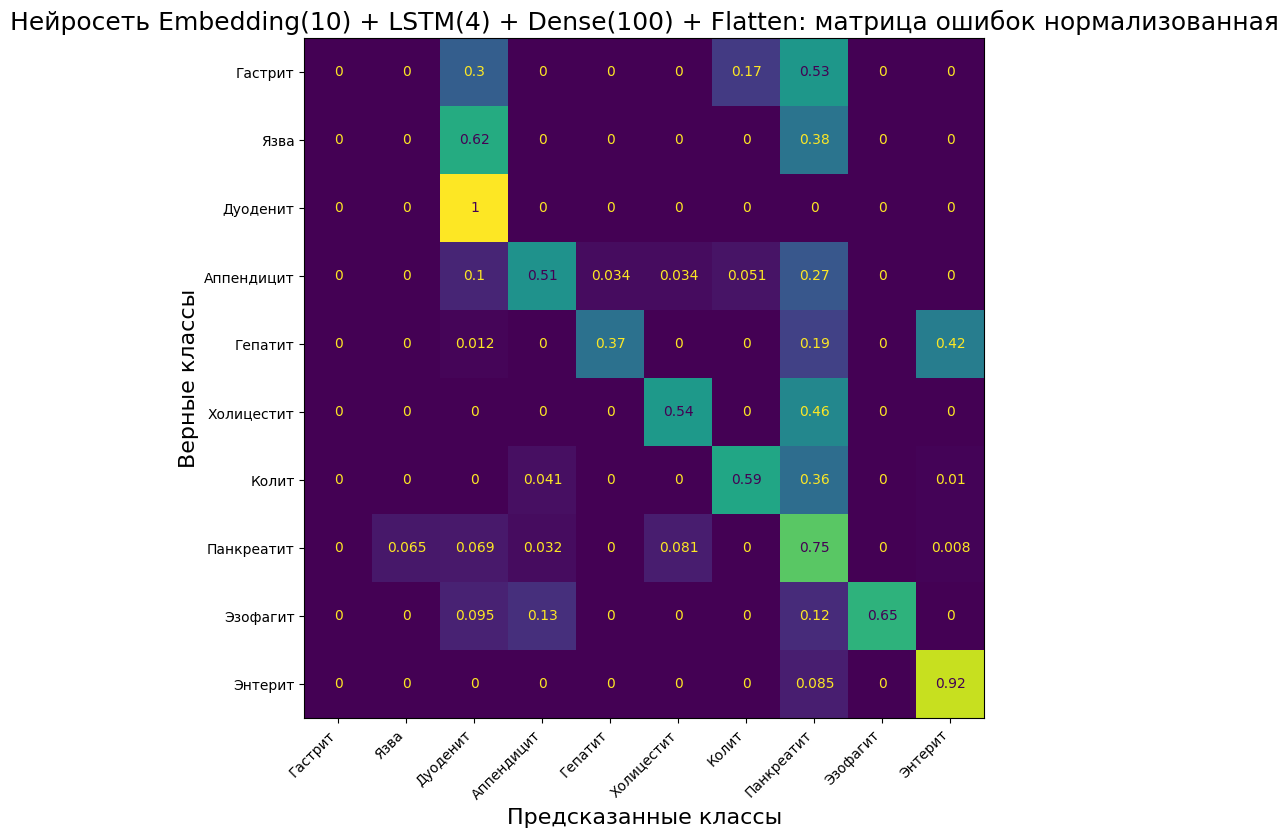

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding(10) + LSTM(4) + Dense(100) + Flatten
Класс: Гастрит               53% сеть отнесла к классу Панкреатит           - НЕВЕРНО :-(
Класс: Язва                  62% сеть отнесла к классу Дуоденит             - НЕВЕРНО :-(
Класс: Дуоденит             100% сеть отнесла к классу Дуоденит             - ВЕРНО :-)
Класс: Аппендицит            51% сеть отнесла к классу Аппендицит           - ВЕРНО :-)
Класс: Гепатит               42% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Холицестит            54% сеть отнесла к классу Холицестит           - ВЕРНО :-)
Класс: Колит                 59% сеть отнесла к классу Колит                - ВЕРНО :-)
Класс: Панкреатит            75% сеть отнесла к классу Панкреатит           - ВЕРНО :-)
Класс: Эзофагит              65% сеть отнесла к классу Эзофагит             - ВЕРНО :-)
Класс: Энтерит               92% сеть отнес

In [ ]:
model_LSTM_9 = Sequential()
model_LSTM_9.add(Embedding(VOCAB_SIZE, 10, input_length=WIN_SIZE))
model_LSTM_9.add(SpatialDropout1D(0.4))
model_LSTM_9.add(BatchNormalization())
# Рекуррентный слой LSTM
model_LSTM_9.add(LSTM(4, return_sequences=True))
model_LSTM_9.add(Dropout(0.5))
model_LSTM_9.add(BatchNormalization())
# Дополнительный полносвязный слой
model_LSTM_9.add(Dense(100, activation='relu'))
model_LSTM_9.add(Dropout(0.5))
model_LSTM_9.add(BatchNormalization())
# Слой выравнивания/сглаживания ("сплющивание" данных в вектор)
model_LSTM_9.add(Flatten())
model_LSTM_9.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_LSTM_9,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='rmsprop',
                         epochs=100,
                         batch_size=200,
                         class_labels=CLASS_LIST,
                         title='Embedding(10) + LSTM(4) + Dense(100) + Flatten')

#####**Исследование №4: Conv1D №1**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 10)            18000     
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 50, 10)           0         
 lDropout1D)                                                     
                                                                 
 batch_normalization_8 (Batc  (None, 50, 10)           40        
 hNormalization)                                                 
                                                                 
 conv1d (Conv1D)             (None, 50, 20)            1020      
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 20)            2020      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 23, 20)          

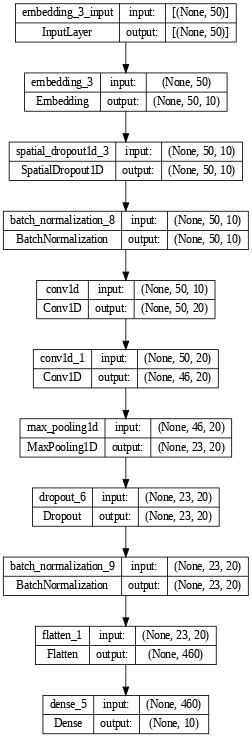

Epoch 1/100
31/31 [==============================] - 9s 112ms/step - loss: 2.5628 - accuracy: 0.1747 - val_loss: 2.2255 - val_accuracy: 0.2166
Epoch 2/100
31/31 [==============================] - 3s 109ms/step - loss: 1.2176 - accuracy: 0.5726 - val_loss: 2.3239 - val_accuracy: 0.2166
Epoch 3/100
31/31 [==============================] - 2s 73ms/step - loss: 0.4292 - accuracy: 0.8749 - val_loss: 2.6195 - val_accuracy: 0.1022
Epoch 4/100
31/31 [==============================] - 2s 53ms/step - loss: 0.1353 - accuracy: 0.9743 - val_loss: 2.8977 - val_accuracy: 0.2568
Epoch 5/100
31/31 [==============================] - 1s 44ms/step - loss: 0.0541 - accuracy: 0.9908 - val_loss: 3.2413 - val_accuracy: 0.2419
Epoch 6/100
31/31 [==============================] - 2s 55ms/step - loss: 0.0262 - accuracy: 0.9949 - val_loss: 3.5266 - val_accuracy: 0.2952
Epoch 7/100
31/31 [==============================] - 1s 25ms/step - loss: 0.0170 - accuracy: 0.9974 - val_loss: 3.7583 - val_accuracy: 0.2271
Epoc

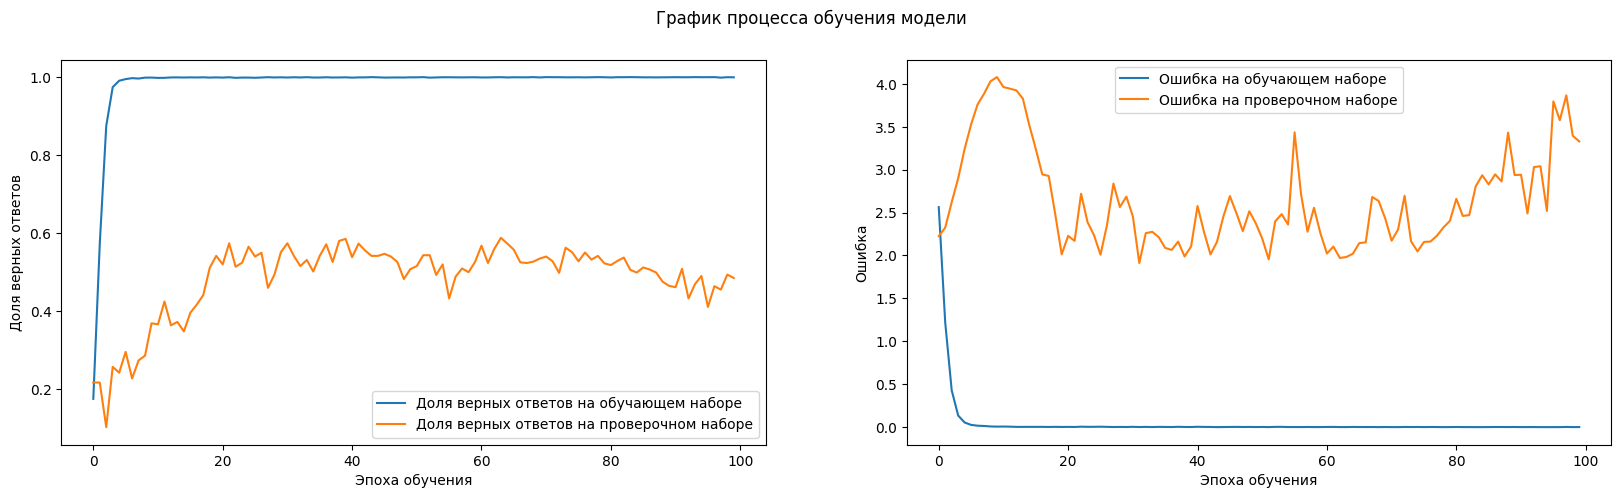

36/36 [==============================] - 0s 4ms/step


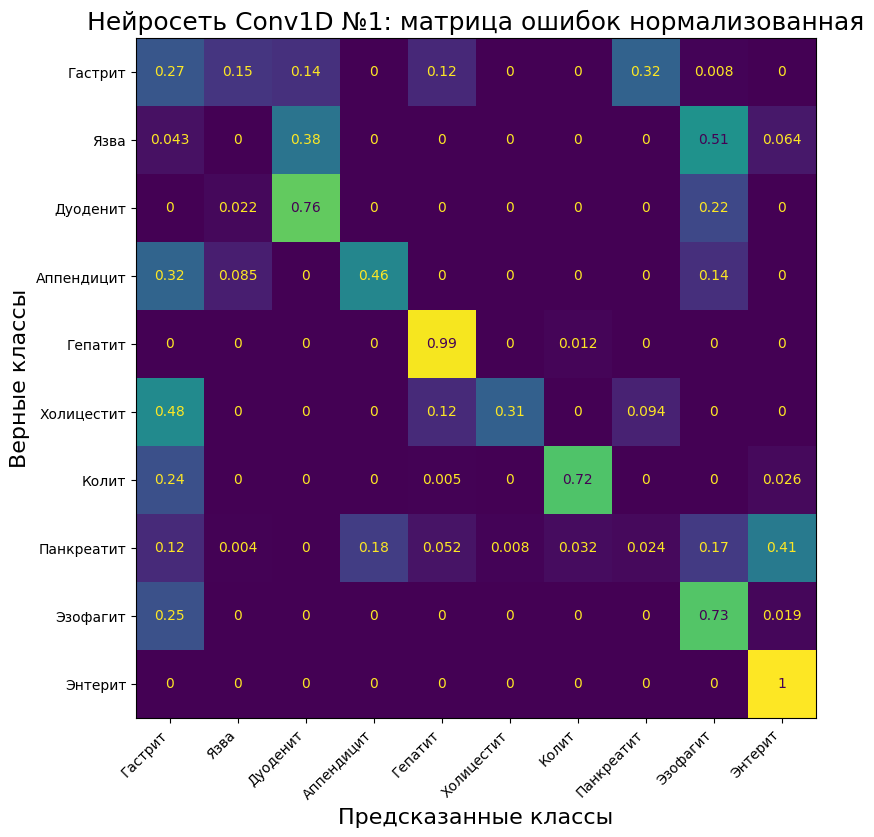

----------------------------------------------------------------------------------------------------
Нейросеть: Conv1D №1
Класс: Гастрит               32% сеть отнесла к классу Панкреатит           - НЕВЕРНО :-(
Класс: Язва                  51% сеть отнесла к классу Эзофагит             - НЕВЕРНО :-(
Класс: Дуоденит              76% сеть отнесла к классу Дуоденит             - ВЕРНО :-)
Класс: Аппендицит            46% сеть отнесла к классу Аппендицит           - ВЕРНО :-)
Класс: Гепатит               99% сеть отнесла к классу Гепатит              - ВЕРНО :-)
Класс: Холицестит            48% сеть отнесла к классу Гастрит              - НЕВЕРНО :-(
Класс: Колит                 72% сеть отнесла к классу Колит                - ВЕРНО :-)
Класс: Панкреатит            41% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Эзофагит              73% сеть отнесла к классу Эзофагит             - ВЕРНО :-)
Класс: Энтерит              100% сеть отнесла к классу Энтерит              - 

In [ ]:
model_Conv_1 = Sequential()
model_Conv_1.add(Embedding(VOCAB_SIZE, 10, input_length=WIN_SIZE))
model_Conv_1.add(SpatialDropout1D(0.2))
model_Conv_1.add(BatchNormalization())
# Два слоя одномерной свертки Conv1D
model_Conv_1.add(Conv1D(20, 5, activation='relu', padding='same'))
model_Conv_1.add(Conv1D(20, 5, activation='relu'))
# Слой подвыборки/пулинга с функцией максимума
model_Conv_1.add(MaxPooling1D(2)) 
model_Conv_1.add(Dropout(0.2))
model_Conv_1.add(BatchNormalization())
model_Conv_1.add(Flatten())
model_Conv_1.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_Conv_1,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='rmsprop',
                         epochs=100,
                         batch_size=200,
                         class_labels=CLASS_LIST,
                         title='Conv1D №1')

####**Исследование №5: Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 50, 50)            90000     
                                                                 
 spatial_dropout1d_6 (Spatia  (None, 50, 50)           0         
 lDropout1D)                                                     
                                                                 
 batch_normalization_16 (Bat  (None, 50, 50)           200       
 chNormalization)                                                
                                                                 
 bidirectional_6 (Bidirectio  (None, 50, 16)           3776      
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 50, 16)           1600      
 nal)                                                 

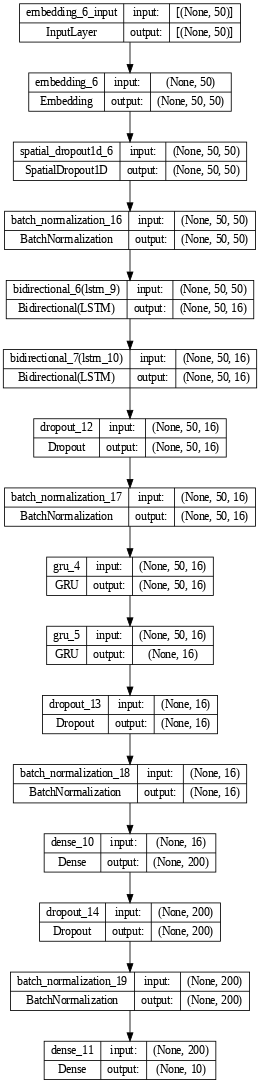

Epoch 1/100
12/12 [==============================] - 17s 305ms/step - loss: 2.6661 - accuracy: 0.1411 - val_loss: 2.2772 - val_accuracy: 0.2166
Epoch 2/100
12/12 [==============================] - 1s 115ms/step - loss: 2.1119 - accuracy: 0.2847 - val_loss: 2.2606 - val_accuracy: 0.2166
Epoch 3/100
12/12 [==============================] - 2s 128ms/step - loss: 1.5966 - accuracy: 0.4551 - val_loss: 2.2564 - val_accuracy: 0.2166
Epoch 4/100
12/12 [==============================] - 1s 72ms/step - loss: 1.1211 - accuracy: 0.6149 - val_loss: 2.2674 - val_accuracy: 0.2166
Epoch 5/100
12/12 [==============================] - 1s 123ms/step - loss: 0.7653 - accuracy: 0.7422 - val_loss: 2.2886 - val_accuracy: 0.1983
Epoch 6/100
12/12 [==============================] - 1s 49ms/step - loss: 0.5244 - accuracy: 0.8319 - val_loss: 2.3021 - val_accuracy: 0.1782
Epoch 7/100
12/12 [==============================] - 1s 56ms/step - loss: 0.3638 - accuracy: 0.8876 - val_loss: 2.3045 - val_accuracy: 0.0795
E

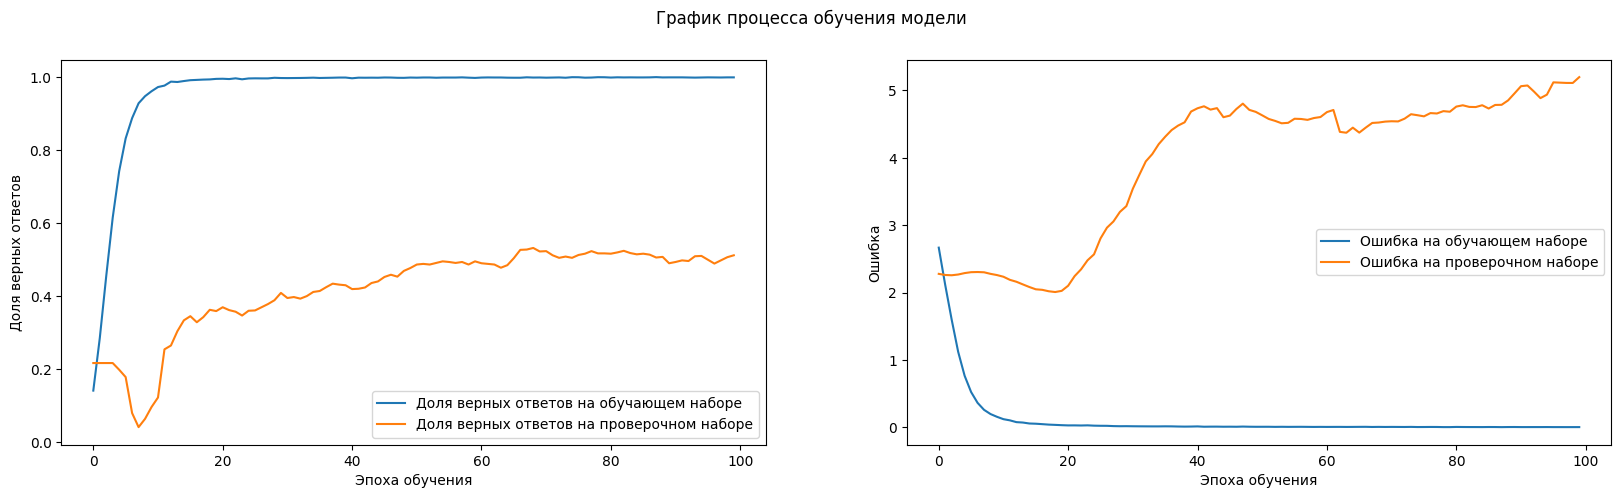

36/36 [==============================] - 2s 8ms/step


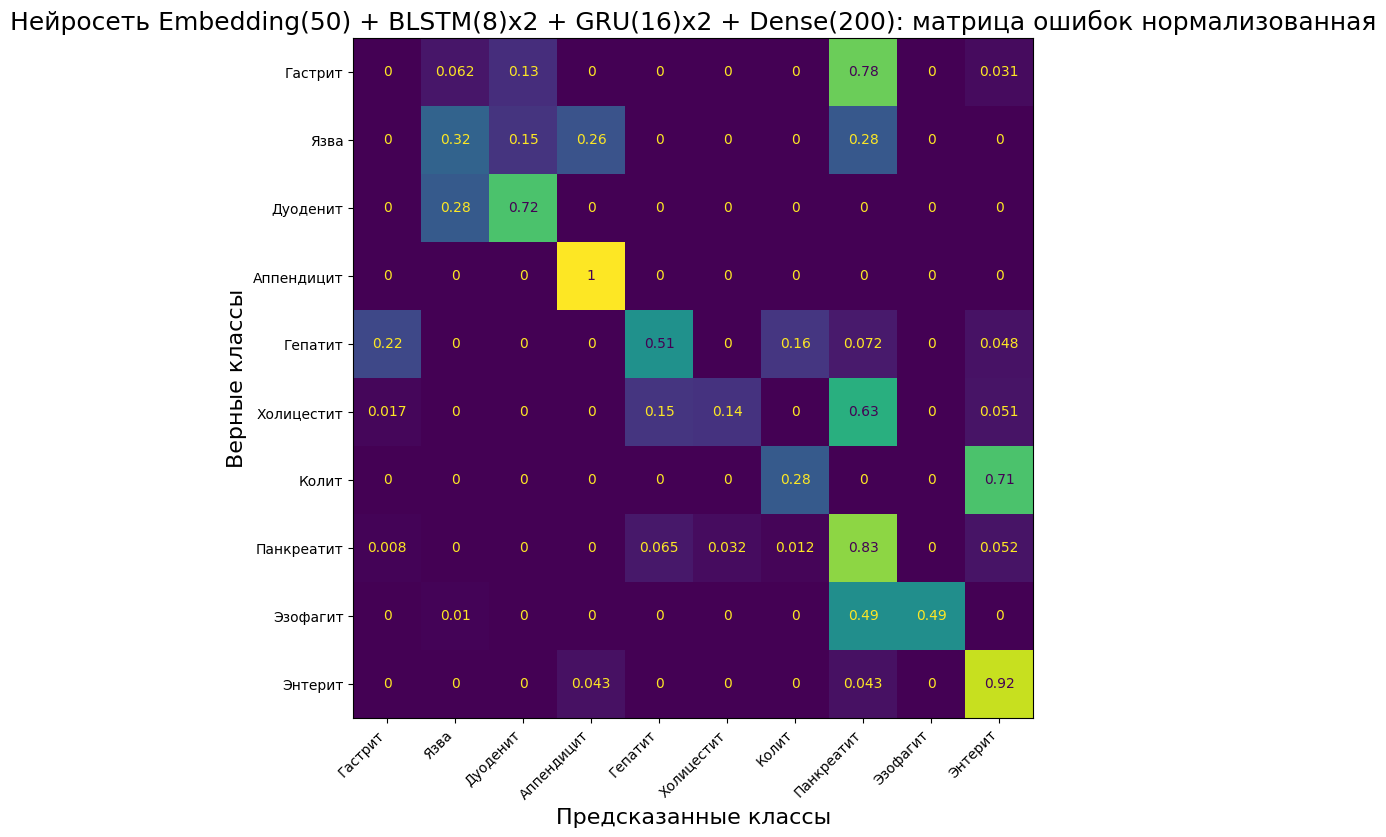

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)
Класс: Гастрит               78% сеть отнесла к классу Панкреатит           - НЕВЕРНО :-(
Класс: Язва                  32% сеть отнесла к классу Язва                 - ВЕРНО :-)
Класс: Дуоденит              72% сеть отнесла к классу Дуоденит             - ВЕРНО :-)
Класс: Аппендицит           100% сеть отнесла к классу Аппендицит           - ВЕРНО :-)
Класс: Гепатит               51% сеть отнесла к классу Гепатит              - ВЕРНО :-)
Класс: Холицестит            63% сеть отнесла к классу Панкреатит           - НЕВЕРНО :-(
Класс: Колит                 72% сеть отнесла к классу Энтерит              - НЕВЕРНО :-(
Класс: Панкреатит            83% сеть отнесла к классу Панкреатит           - ВЕРНО :-)
Класс: Эзофагит              50% сеть отнесла к классу Панкреатит           - НЕВЕРНО :-(
Класс: Энтерит               92% сет

In [ ]:
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=WIN_SIZE))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
# Два двунаправленных рекуррентных слоя LSTM
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Два рекуррентных слоя GRU
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Дополнительный полносвязный слой
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_LSTM_6,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='adam',
                         epochs=100,
                         batch_size=512,
                         class_labels=CLASS_LIST,
                         title='Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)')

#####**Исследование №6: Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200) оптимизатор rmsprop**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 50, 50)            90000     
                                                                 
 spatial_dropout1d_12 (Spati  (None, 50, 50)           0         
 alDropout1D)                                                    
                                                                 
 batch_normalization_40 (Bat  (None, 50, 50)           200       
 chNormalization)                                                
                                                                 
 bidirectional_18 (Bidirecti  (None, 50, 16)           3776      
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 50, 16)           1600      
 onal)                                               

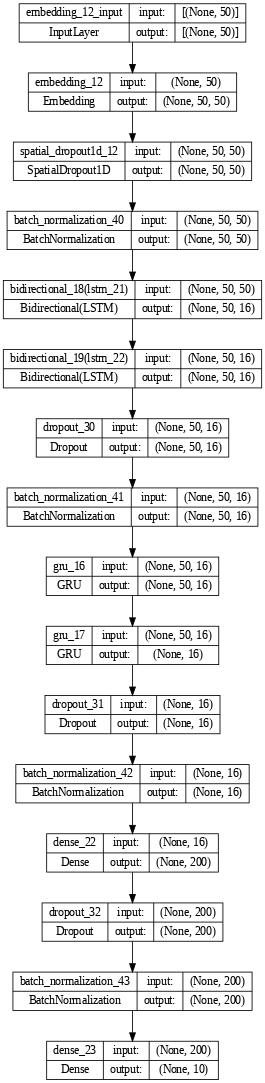

Epoch 1/100
24/24 [==============================] - 17s 242ms/step - loss: 2.3501 - accuracy: 0.2168 - val_loss: 2.2433 - val_accuracy: 0.2166
Epoch 2/100
24/24 [==============================] - 2s 98ms/step - loss: 1.4595 - accuracy: 0.4806 - val_loss: 2.2427 - val_accuracy: 0.2166
Epoch 3/100
24/24 [==============================] - 2s 89ms/step - loss: 0.7681 - accuracy: 0.7364 - val_loss: 2.2798 - val_accuracy: 0.2166
Epoch 4/100
24/24 [==============================] - 3s 103ms/step - loss: 0.4077 - accuracy: 0.8596 - val_loss: 2.3374 - val_accuracy: 0.2166
Epoch 5/100
24/24 [==============================] - 3s 113ms/step - loss: 0.2386 - accuracy: 0.9244 - val_loss: 2.3634 - val_accuracy: 0.2166
Epoch 6/100
24/24 [==============================] - 2s 73ms/step - loss: 0.1493 - accuracy: 0.9580 - val_loss: 2.4714 - val_accuracy: 0.2070
Epoch 7/100
24/24 [==============================] - 1s 46ms/step - loss: 0.0925 - accuracy: 0.9761 - val_loss: 2.6391 - val_accuracy: 0.2122
Ep

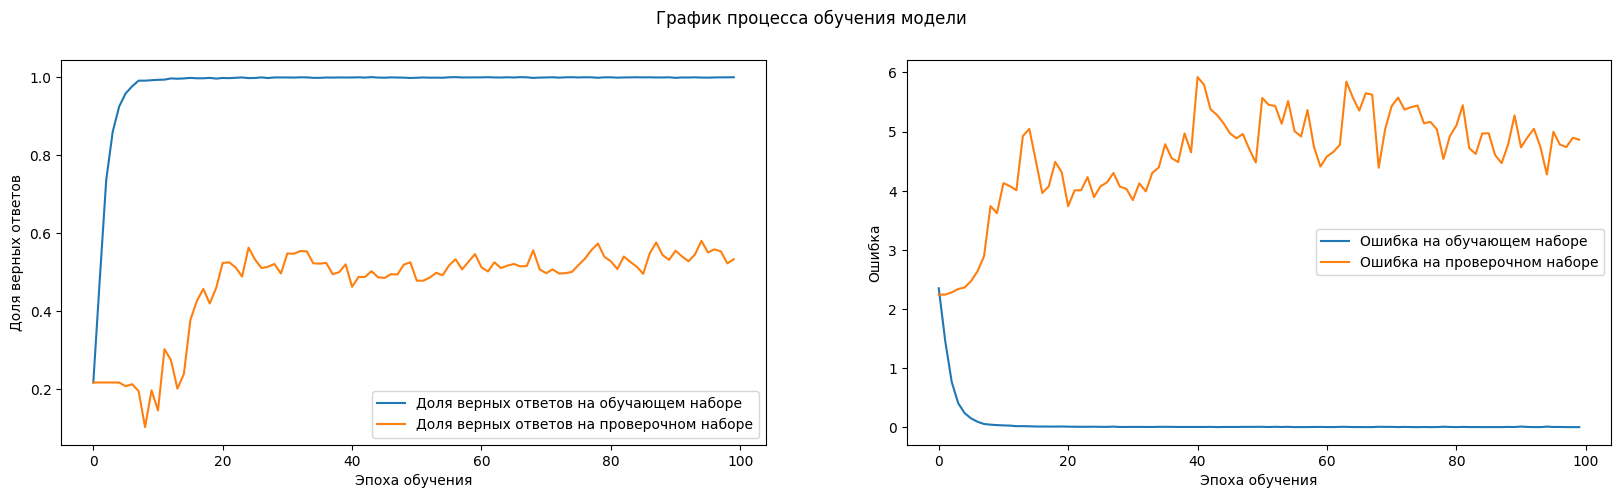

36/36 [==============================] - 3s 8ms/step


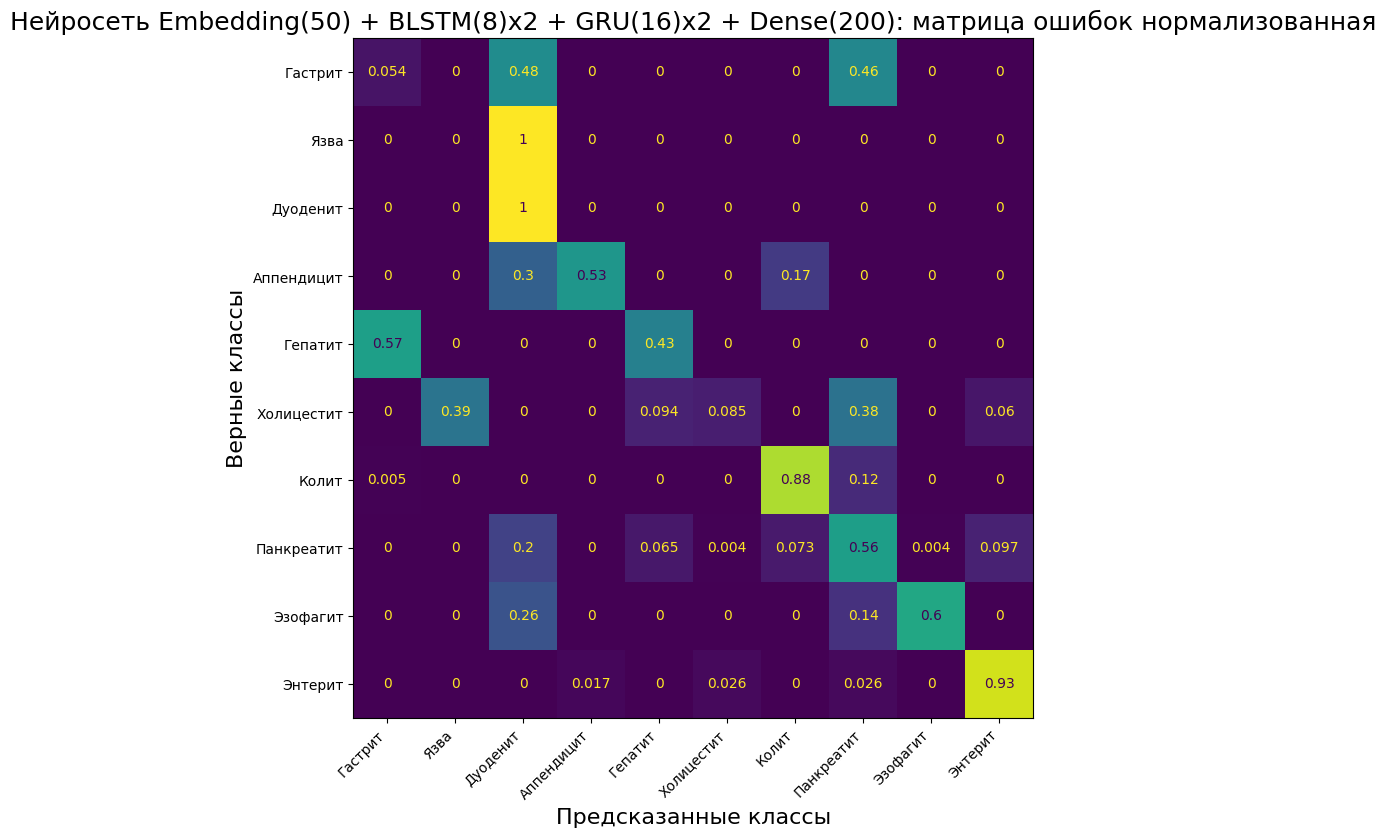

----------------------------------------------------------------------------------------------------
Нейросеть: Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)
Класс: Гастрит               48% сеть отнесла к классу Дуоденит             - НЕВЕРНО :-(
Класс: Язва                 100% сеть отнесла к классу Дуоденит             - НЕВЕРНО :-(
Класс: Дуоденит             100% сеть отнесла к классу Дуоденит             - ВЕРНО :-)
Класс: Аппендицит            52% сеть отнесла к классу Аппендицит           - ВЕРНО :-)
Класс: Гепатит               57% сеть отнесла к классу Гастрит              - НЕВЕРНО :-(
Класс: Холицестит            38% сеть отнесла к классу Язва                 - НЕВЕРНО :-(
Класс: Колит                 88% сеть отнесла к классу Колит                - ВЕРНО :-)
Класс: Панкреатит            56% сеть отнесла к классу Панкреатит           - ВЕРНО :-)
Класс: Эзофагит              60% сеть отнесла к классу Эзофагит             - ВЕРНО :-)
Класс: Энтерит               93% сет

In [ ]:
model_LSTM_6 = Sequential()
model_LSTM_6.add(Embedding(VOCAB_SIZE, 50, input_length=WIN_SIZE))
model_LSTM_6.add(SpatialDropout1D(0.4))
model_LSTM_6.add(BatchNormalization())
# Два двунаправленных рекуррентных слоя LSTM
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Bidirectional(LSTM(8, return_sequences=True)))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Два рекуррентных слоя GRU
model_LSTM_6.add(GRU(16, return_sequences=True, reset_after=True))
model_LSTM_6.add(GRU(16, reset_after=True))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
# Дополнительный полносвязный слой
model_LSTM_6.add(Dense(200, activation='relu'))
model_LSTM_6.add(Dropout(0.3))
model_LSTM_6.add(BatchNormalization())
model_LSTM_6.add(Dense(CLASS_COUNT, activation='softmax'))

compile_train_eval_model(model_LSTM_6,
                         x_train, y_train,
                         x_test, y_test,
                         optimizer='rmsprop',
                         epochs=100,
                         batch_size=256,
                         class_labels=CLASS_LIST,
                         title='Embedding(50) + BLSTM(8)x2 + GRU(16)x2 + Dense(200)')